In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tpmontrouge.experiment.continuous_acquisition import AIExperiment
from tpmontrouge.instrument.analog_input.test.simu_ai import AnalogInputThreadSimulation

In [3]:
interf_thread = AnalogInputThreadSimulation('test')

In [4]:
class MyExperiment(AIExperiment):
    fig = None
    
    @property
    def number_of_lines(self):
        return 1
    
    def record_new_point(self):
        fig = self.fig
        new_point = self._interface.get_one_block()
        for ch_name, val in new_point.items():
            self._acquisition_lines[ch_name].add_one_block(val)
        if fig is not None:
            fig.clf()
            self.plot_matplotlib(fig)
            fig.canvas.draw()
            
    def plot_matplotlib(self, fig=None):
        number_of_lines = len(self._acquisition_lines)
        for i, (ch_name, ai_line) in enumerate(self._acquisition_lines.items()):
            axe = fig.add_subplot(number_of_lines, 1, i+1)
            axe.plot(ai_line.times, ai_line.data)
            axe.grid(True)
            axe.set_ylabel(ai_line.y_label)
            axe.set_title(ai_line.name)      
        axe.set_xlabel('Temps (s)')
        fig.tight_layout()          

<IPython.core.display.Javascript object>


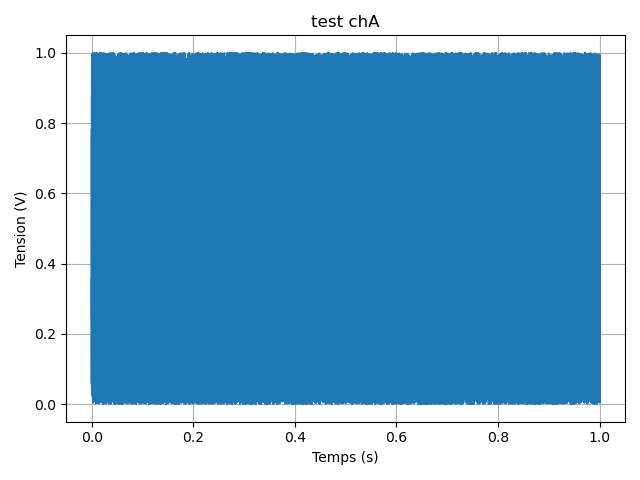

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


ai_experiment = MyExperiment(interf_thread, ['chA'], sample_rate=100000, block_size=10000, N_block=10, disp=False)
ai_experiment.fig = fig
ai_experiment.loop()

# for i in range(0,100):
#     ax = fig.add_subplot(self.number_of_lines, 1, i+1)
#     ax.clear()
#     ax.plot([1, 2], [1, 2])
#     fig.canvas.draw()

In [6]:
len(ai_experiment._acquisition_lines['chA'].data)

100000